<a href="https://colab.research.google.com/github/alelorca1977/helloworld/blob/master/AnalisisVentasAutos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA)



In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df_autos = pd.read_csv('bbdd_prueba_corp1.csv', encoding='utf-8', sep=';')

In [ ]:
len(df_autos)

24744

In [ ]:
df_autos.head(5)

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA
0,393A4B4C-085,TOYOTA,RAV 4,2015,50838335,TEMUCO,9,M,NaN,11947500.0,NaN,BLANCO,NaN,N
1,B1F3DB7E-F67,MAZDA,CX 5,2016,46322649,VILLA ALEMANA,5,M,NaN,NaN,NaN,NEGRO,38.0,S
2,F6DBB2E6-A76,GREAT WALL,HAVAL NEW H3 2.0,2014,36226810,ANTOFAGASTA,DE ANTOFAGASTA,NaN,NaN,NaN,NaN,NEGRO,49.0,S
3,EBCF63CD-99D,JEEP,COMPASS SPORT 2.4,2013,43482783,NaN,NaN,NaN,NaN,NaN,20160418.0,GRIS,40.0,S
4,FF38B368-B0F,SUBARU,FORESTER 2.0,2017,25657273,NaN,NaN,NaN,NaN,NaN,NaN,GRIS,62.0,S


In [ ]:
df_autos.columns

Index(['PATENTE', 'MARCA', 'MODELO', 'AÑO', 'ID_CLIENTE', 'COMUNA', 'REGION',
       'SEXO', 'ACTIVIDAD', 'TASACION', 'FEC_TRANSFERENCIA', 'COLOR2', 'EDAD',
       'VIGENCIA'],
      dtype='object')

In [ ]:
df_autos.PATENTE.describe()

count           470664
unique          354860
top       5C630692-5A0
freq                 7
Name: PATENTE, dtype: object

In [ ]:
df_autos.MARCA.describe()

count      470313
unique         86
top       HYUNDAI
freq        49842
Name: MARCA, dtype: object

In [ ]:
df_autos.AÑO.describe()

count    470663.000000
mean       2013.513550
std           2.351585
min        2010.000000
25%        2012.000000
50%        2013.000000
75%        2015.000000
max        2018.000000
Name: AÑO, dtype: float64

In [ ]:
df_autos.TASACION.describe()

count    2.860880e+05
mean     5.788223e+06
std      6.477430e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.870000e+06
75%      9.988333e+06
max      8.590500e+07
Name: TASACION, dtype: float64

In [ ]:
df_autos.EDAD.describe()

count    329069.000000
mean         48.970435
std          12.592421
min           3.000000
25%          39.000000
50%          48.000000
75%          58.000000
max          99.000000
Name: EDAD, dtype: float64

In [ ]:
df_autos.FEC_TRANSFERENCIA.describe()

count    1.586810e+05
mean     2.015153e+07
std      1.684521e+04
min      2.009103e+07
25%      2.014062e+07
50%      2.015112e+07
75%      2.017011e+07
max      2.018011e+07
Name: FEC_TRANSFERENCIA, dtype: float64

In [ ]:
# TRANSFORMAR COLUMNA FECHA DE FLOAT A DATETIME

from datetime import datetime, timedelta
for i in range(len(df_autos)):
  if (df_autos.loc[i,'FEC_TRANSFERENCIA'] > 20120100):
    f = df_autos.loc[i,'FEC_TRANSFERENCIA']
    df_autos.loc[i,'FECHA_TRANS'] = datetime.strptime(str(int(f)), '%Y%m%d') + timedelta(days=f-int(f))

In [ ]:
# GUARDAR NUEVO ARCHIVO CON LA COLUMNA NUEVA EN FORMATO FECHA
from google.colab import drive
drive.mount('/content/drive')
df_autos.to_csv('/content/drive/MyDrive/data_autos.csv',index=False)

Mounted at /content/drive


In [ ]:
# ABRIR NUEVO ARCHIVO PARA TRABAJAR ANÁLISIS EXPLORATORIO
from google.colab import drive
drive.mount('/content/drive')
df_data = pd.read_csv('/content/drive/MyDrive/data_autos.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_data.head(5)

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA,FECHA_TRANS
0,393A4B4C-085,TOYOTA,RAV 4,2015,50838335,TEMUCO,9,M,NaN,11947500.0,NaN,BLANCO,NaN,N,0 NaN\n1 NaN\n2 ...
1,B1F3DB7E-F67,MAZDA,CX 5,2016,46322649,VILLA ALEMANA,5,M,NaN,NaN,NaN,NEGRO,38.0,S,0 NaN\n1 NaN\n2 ...
2,F6DBB2E6-A76,GREAT WALL,HAVAL NEW H3 2.0,2014,36226810,ANTOFAGASTA,DE ANTOFAGASTA,NaN,NaN,NaN,NaN,NEGRO,49.0,S,0 NaN\n1 NaN\n2 ...
3,EBCF63CD-99D,JEEP,COMPASS SPORT 2.4,2013,43482783,NaN,NaN,NaN,NaN,NaN,20160418.0,GRIS,40.0,S,2016-04-18 00:00:00
4,FF38B368-B0F,SUBARU,FORESTER 2.0,2017,25657273,NaN,NaN,NaN,NaN,NaN,NaN,GRIS,62.0,S,0 NaN\n1 NaN\n2 ...


In [ ]:
df_data.FECHA_TRANS.describe()

count                                                671065
unique                                                 1797
top       0                NaN\n1                NaN\n2 ...
freq                                                 452579
Name: FECHA_TRANS, dtype: object

In [ ]:
df_data.COLOR2.describe()

count     662697
unique       825
top         GRIS
freq      154228
Name: COLOR2, dtype: object

## Supuestos:

* Para este caso de estudio no se eliminarán filas con datos faltantes, puesto que para descubrir patrones se pudiese perder información relevante.
* No se aplicarán técnicas de imputación. Por desconocimiento del negocio se podrían producir inconsistencias en los resultados. Por esta razón consideraremos solo los registros que contengan datos.
* Dependiendo de cada gráfica se aplicarán los filtros correspondientes para no alterar el resultado debido a los datos faltantes.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



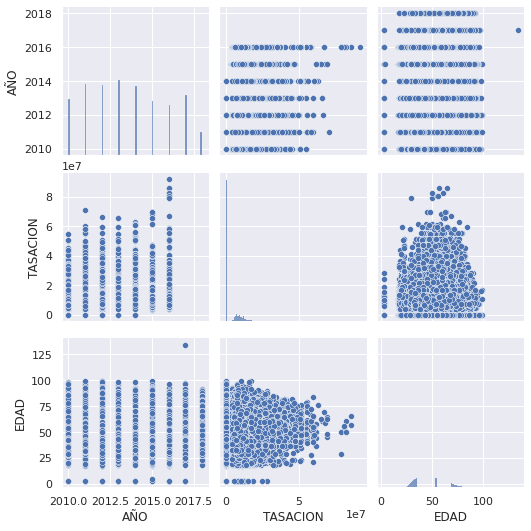

In [ ]:
import seaborn as sns
sns.set()
cols = ['AÑO', 'TASACION', 'EDAD']
sns.pairplot(df_data[cols], size = 2.5)
plt.show();